<a href="https://colab.research.google.com/github/ranjan336/E-Mtech/blob/main/2022PAI9045_DL_Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Name: Korikana
#### Roll: 2022PAI9045
#### Sub: DL Project # 3
#### Email: korikana.opd21034@iiitd.ac.in
#### Email: 2022PAI9045@iitjammu.ac.in

# Visualizing ***CNN*** Filters

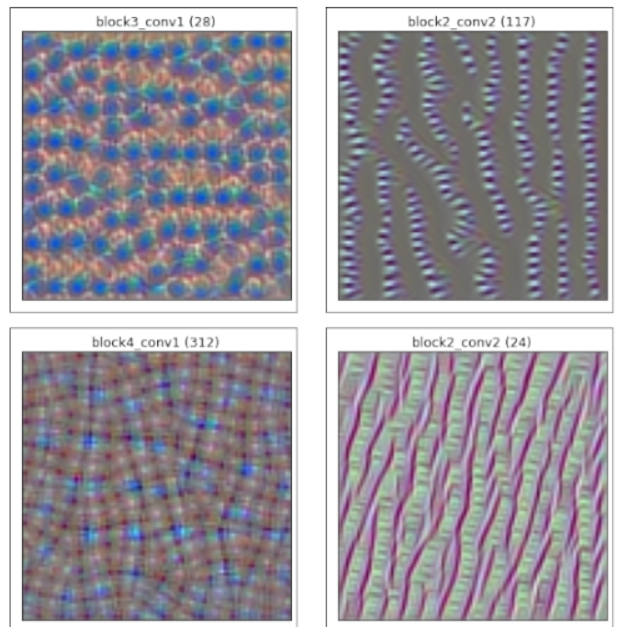

### Model Downloading

In [ ]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt

In [ ]:
# VGG16 :Visual Geometry Group 16
# instance of the VGG16 model
# weights='imagenet'(default weights and dataset)
# (96, 96, 3) : 3-channel (RGB) image with a resolution of 96x96 pixels

model = tf.keras.applications.vgg16.VGG16(
    include_top=False, weights = 'imagenet',
    input_shape = (96, 96,3)
)

model.summary()

58889256/58889256 [==============================] - 13s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 96, 96, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 96, 96, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 48, 48, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 48, 48, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 48, 48, 128)       147584    
                                                             

### Get Layer Output

In [ ]:
def get_submodel(layer_name):
  return tf.keras.models.Model(
      model.input, model.get_layer(layer_name).output
  )
get_submodel('block1_conv2').summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 96, 96, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 96, 96, 64)        36928     
                                                                 
Total params: 38720 (151.25 KB)
Trainable params: 38720 (151.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Image Visualization

In [ ]:
# minval=0.5 and maxval=0.5: pixel values in the image will be uniformly distributed between 0.5 and 0.5, effectively creating an constant gray color.
# image - tf.math.reduce_min(image) = It subtracts the minimum pixel value from each pixel in the image
def create_image():
  return tf.random.uniform((96,96,3), minval=0.5, maxval =0.5)

def plot_image(image, title = 'random'):
  image = image - tf.math.reduce_min(image)
  image = image / tf.math.reduce_max(image)
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])
  plt.title(title)
  plt.show()

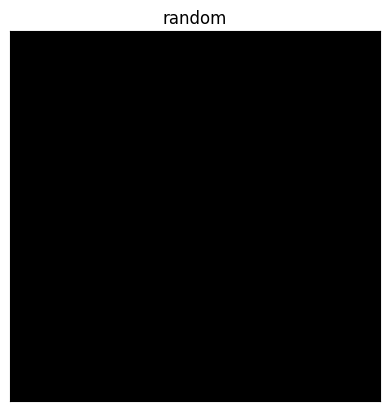

In [ ]:
image = create_image()
plot_image(image)

**Why men in black?** (kidding)

* image = image - tf.math.reduce_min(image): This operation subtracts the minimum pixel value from the image. Since all pixel values in the generated image are 0.5, subtracting the minimum (0.5) results in all pixel values becoming 0.
* image = image / tf.math.reduce_max(image): This operation divides the image by the maximum pixel value. Since all pixel values are now 0, dividing by the maximum (0) results in all pixel values becoming 0.
* After these operations, the image variable contains an image with all pixel values set to 0.


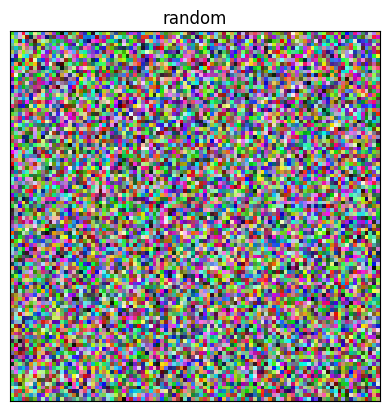

In [ ]:
def create_image():
    return tf.random.uniform((96, 96, 3), minval=0.0, maxval=1.0)  # Adjust the minval and maxval for desired image color

def plot_image(image, title='random'):
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.title(title)
    plt.show()

image = create_image()
plot_image(image)

### Training Loop

In [ ]:
def visualize_filter(layer_name, f_index=None, iters=50):
  submodel = get_submodel(layer_name)
  num_filters = submodel.output.shape[-1]

  if f_index is None:
    f_index = random.randint(0, num_filters -1)
  assert num_filters > f_index, 'f_index is out of bounds'

  image = create_image()
  verbose_step = int(iters/10)

  for i in range(0, iters):
    with tf.GradientTape() as tape:
      tape.watch(image)
      out = submodel(tf.expand_dims(image, axis=0))[:,:,:,f_index]
      loss = tf.math.reduce_mean(out)
    grads = tape.gradient(loss, image)
    grads = tf.math.l2_normalize(grads)
    image += grads * 10

    if (i+1) % verbose_step ==0:
      print(f'Iteration: {i+1}, Loss: {loss.numpy():.4f}')

  plot_image(image, f'{layer_name},{f_index}')


### Final Results

In [ ]:
print([layer.name for layer in model.layers if 'conv' in layer.name])

['block1_conv1', 'block1_conv2', 'block2_conv1', 'block2_conv2', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block5_conv1', 'block5_conv2', 'block5_conv3']


Iteration: 5, Loss: 66.8988
Iteration: 10, Loss: 112.5109
Iteration: 15, Loss: 158.8203
Iteration: 20, Loss: 210.5452
Iteration: 25, Loss: 268.6343
Iteration: 30, Loss: 331.1095
Iteration: 35, Loss: 398.0672
Iteration: 40, Loss: 467.5334


Iteration: 45, Loss: 538.7515
Iteration: 50, Loss: 611.0320


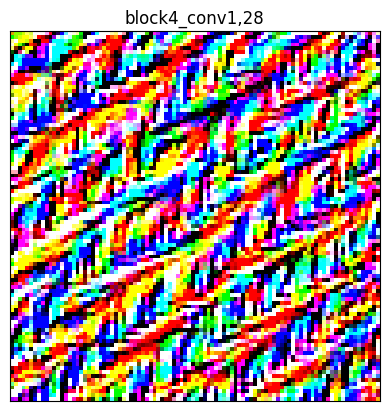

In [ ]:
layer_name = 'block4_conv1' #@param ['block1_conv1', 'block1_conv2', 'block2_conv1', 'block2_conv2', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block5_conv1', 'block5_conv2', 'block5_conv3']

visualize_filter(layer_name) # visualize_filter(layer_name, iters=100)